# IMPORT LIBRARIES

In [1]:
# Modules needed
import sys
# scipy # for statistics
import scipy
# numpy for array, matrix and vector calculations
import numpy as np
# matplotlib for graphs
import pandas as pd
# scikit-learn for machine learning
import sklearn

# Load  specialised libraries
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
# model selection
from sklearn import model_selection
# kpi: evaulating the performance of the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import fbeta_score
# the stars of the show: the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Load the Dataset

We load the data from a CSV file

We are using pandas to load the data. 

Note that we are specifying the names of each column when loading the data.

In [3]:
# Load dataset
filename1 ='Donor Raw Data_ML with Python.csv'
dataset = pandas.read_csv(filename1)

# Summarise the Dataset

We look at the data a few different ways:

1. Dimensions of the dataset.
2. Peek at the data itself.
3. Statistical summary of all attributes.
4. Breakdown of the data by the class variable.


### 1. Dimensions of Dataset
We get an idea of how many instances (rows) 
and how many attributes (columns) the data
contains with the shape property.

In [4]:
# shape
print(dataset.shape)
print()
print(dataset.columns)

(19372, 50)

Index(['TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'SES', 'CLUSTER_CODE',
       'HOME_OWNER', 'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE',
       'OVERLAY_SOURCE', 'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOME_VALUE',
       'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME',
       'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'RECENCY_STATUS_96NK',
       'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP', 'RECENT_AVG_GIFT_AMT',
       'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT',
       'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
       'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_CARD_PROM', 'LIFETIME_PROM',
       'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT',
       'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT',
       'LAST_GIFT_AMT', 'CARD_PROM

### 2. Peek at the Data

In [5]:
# head
# we use transpose to invert columns and rows
# and make the result dataframe more readable
print(dataset.head(7).transpose()) 

# We save a sample of 250 lines as CSV to review in MS Excel
dataset.sample(250).to_csv('sample.csv', sep=',', encoding='utf-8')

                                 0      1      2      3      4      5      6
TARGET_B                         0      1      0      0      0      0      0
TARGET_D                       NaN     10    NaN    NaN    NaN    NaN    NaN
CONTROL_NUMBER                   5     12     37     38     41     52     53
MONTHS_SINCE_ORIGIN            101    137    113     92    101    101     89
DONOR_AGE                       87     79     75    NaN     74     63     71
IN_HOUSE                         0      0      0      0      0      0      0
URBANICITY                       ?      R      S      U      R      U      R
SES                              ?      2      1      2      2      3      3
CLUSTER_CODE                     .     45     11     04     49     08     50
HOME_OWNER                       H      H      H      H      U      U      H
DONOR_GENDER                     M      M      F      F      F      M      M
INCOME_GROUP                     2      7      5      6      2      3      5

### 3. Statistical Summary
Take a look at a summary of each attribute.
This includes the count, mean, the min and max values as well as some percentiles.

In [6]:
# descriptions
# As the result dataframe is big we have transposed the result
print(dataset.describe().transpose())

# We save the result as CSV to review in MS Excel
dataset.describe().transpose().to_csv('describe.csv', sep=',', encoding='utf-8')

                               count          mean           std    min  \
TARGET_B                     19372.0      0.250000      0.433024   0.00   
TARGET_D                      4843.0     15.624344     12.445137   1.00   
CONTROL_NUMBER               19372.0  96546.225377  55830.643871   5.00   
MONTHS_SINCE_ORIGIN          19372.0     73.409973     41.255574   5.00   
DONOR_AGE                    14577.0     58.919051     16.669382   0.00   
IN_HOUSE                     19372.0      0.073198      0.260469   0.00   
INCOME_GROUP                 14980.0      3.907543      1.864796   1.00   
PUBLISHED_PHONE              19372.0      0.497729      0.500008   0.00   
MOR_HIT_RATE                 19372.0      3.361656      9.503481   0.00   
WEALTH_RATING                10562.0      5.005397      2.815386   0.00   
MEDIAN_HOME_VALUE            19372.0   1079.871929    960.753448   0.00   
MEDIAN_HOUSEHOLD_INCOME      19372.0    341.970215    164.207807   0.00   
PCT_OWNER_OCCUPIED       

### 4. Categorical Variables Distribution
We take a look at the number of instances (rows) that belong to each category.
We do this for all the categorical variables


In [7]:
# distribution / frequency per category

#target variables
t_var = ['TARGET_B', 'TARGET_D']

#categorical variables
cat_var = ['IN_HOUSE', 'INCOME_GROUP', 'PUBLISHED_PHONE', 
           'WEALTH_RATING', 'PEP_STAR',  'RECENT_STAR_STATUS','FREQUENCY_STATUS_97NK', 
           'RECENT_CARD_RESPONSE_COUNT','URBANICITY', 'SES', 'CLUSTER_CODE',
           'HOME_OWNER', 'DONOR_GENDER', 'OVERLAY_SOURCE', 'RECENCY_STATUS_96NK']

for var in cat_var:
 print(dataset.groupby(var).size())


IN_HOUSE
0    17954
1     1418
dtype: int64
INCOME_GROUP
1.0    1822
2.0    2626
3.0    1699
4.0    2526
5.0    3149
6.0    1591
7.0    1567
dtype: int64
PUBLISHED_PHONE
0    9730
1    9642
dtype: int64
WEALTH_RATING
0.0     669
1.0     854
2.0     974
3.0    1046
4.0     987
5.0    1078
6.0    1117
7.0    1199
8.0    1248
9.0    1390
dtype: int64
PEP_STAR
0    9600
1    9772
dtype: int64
RECENT_STAR_STATUS
0     13239
1      4289
2        26
3       346
4       320
5       205
6        88
7       140
8        54
9        15
10       86
11      183
12      122
13       84
14       61
15       26
16       18
17       15
18       12
19       27
20        4
21       10
22        2
dtype: int64
FREQUENCY_STATUS_97NK
1    9118
2    4191
3    3318
4    2745
dtype: int64
RECENT_CARD_RESPONSE_COUNT
0    3936
1    6487
2    4250
3    2331
4    1185
5     631
6     313
7     160
8      60
9      19
dtype: int64
URBANICITY
?     454
C    4022
R    4005
S    4491
T    3944
U    2456
dtype: int64
S

### 5. Missing Data / Duplicate Data / Outliers


In [8]:
# Replace missing data expressed as "?" or "" or "." or NULL
# by NaN (numpy standard nil value)
# so that all missing data values are the same
# adapt the nan_char list to your datasets

nan_char = ["?","" ," .","-","NULL"]
for char in nan_char:
    dataset = dataset.replace(char,np.nan)

# The income of the prospect is very unlikely to be zero
# So we count it as missing (replace later on by the mean)
dataset['PER_CAPITA_INCOME'].replace(0,np.nan, inplace= True)

dataset['RECENT_STAR_STATUS']= np.where(dataset['RECENT_STAR_STATUS']>1,
                                        0, dataset['RECENT_STAR_STATUS'])


In [9]:
# Count the number of missing data per variable
# Below we look at missing data using the pandas isnull() function
# the trick is: boolean value True = 1 so the sum 
# gives the number of records 

# Dataset.isnull().sum() is actually a dataframe and we are filtering out the zeros
# within the square brackets []

# filter on missing data variables
missings = dataset.isnull().sum()[dataset.isnull().sum()!=0]
print('Missing value per variable [5] : \n', missings) 
    


Missing value per variable [5] : 
 TARGET_D                       14529
DONOR_AGE                       4795
URBANICITY                       454
SES                              454
CLUSTER_CODE                     454
INCOME_GROUP                    4392
WEALTH_RATING                   8810
PER_CAPITA_INCOME                173
MONTHS_SINCE_LAST_PROM_RESP      246
dtype: int64


In [24]:
# numerical variable including categorical variables
num_var= ['TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
          'DONOR_AGE', 'IN_HOUSE', 'INCOME_GROUP', 'PUBLISHED_PHONE',
          'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOME_VALUE', 
          'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME',
          'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 
          'PCT_ATTRIBUTE4', 'PEP_STAR', 'RECENT_STAR_STATUS', 
          'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP', 'RECENT_AVG_GIFT_AMT',
          'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT', 
          'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
          'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_CARD_PROM', 'LIFETIME_PROM',
          'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT',
          'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT',
          'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT',
          'MONTHS_SINCE_FIRST_GIFT', 'FILE_AVG_GIFT', 'FILE_CARD_GIFT']

# numerical and continuous variables including target d
cont_var = [ v for v in num_var if v not in cat_var and v not in t_var ]

# We replace continuous numerical variables by their mean
for v in cont_var:
    m = round(dataset[v].mean())
    dataset[v].fillna(value=m, method=None, axis=0, inplace=True)
    
# We replace categorical variables by their mode except the Target B variable!
for v in cat_var:
    m = dataset[v].mode().iloc[0] # mode return a dataframe with the most frequent categories found hence we take the 1st iloc[]
    dataset[v].fillna(value=m, method=None, axis=0, inplace=True)

# We replace the missing value for Target D by Zero / 0 as it means no donation
dataset['TARGET_D'].fillna(value=0, method=None, axis=0, inplace=True)

print(dataset.head(7).transpose())

                                 0      1      2      3      4      5      6
TARGET_B                         0      1      0      0      0      0      0
TARGET_D                         0     10      0      0      0      0      0
CONTROL_NUMBER                   5     12     37     38     41     52     53
MONTHS_SINCE_ORIGIN            101    137    113     92    101    101     89
DONOR_AGE                       87     79     75     59     74     63     71
IN_HOUSE                         0      0      0      0      0      0      0
URBANICITY                       S      R      S      U      R      U      R
SES                              2      2      1      2      2      3      3
CLUSTER_CODE                    40     45     11     04     49     08     50
HOME_OWNER                       H      H      H      H      U      U      H
DONOR_GENDER                     M      M      F      F      F      M      M
INCOME_GROUP                     2      7      5      6      2      3      5

In [26]:
# Here we eliminate variable that are not useful (Control number) or doubling on other features

del_var = ['CONTROL_NUMBER',  'CLUSTER_CODE', 'OVERLAY_SOURCE',
           'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 
           'PCT_ATTRIBUTE4', 'LIFETIME_GIFT_RANGE',
           'FILE_AVG_GIFT','FILE_CARD_GIFT']

dataset.drop(del_var, axis = 1, inplace= True)

In [18]:
# Below we look at duplicated line in the datasets.
# if any duplicates are present:
# drop them with the following code

print('Duplicates Number : \n', dataset.duplicated().sum())
dataset.drop_duplicates(subset=None, keep='first',inplace= True)    
    

Duplicates Number : 
 0


### 6. Transforming Categorical Variable in Boolean 0/1 variables

In [27]:
# Most machine learning models only accept numerical variables
# Some of our variables contains string or letter
# for example Gender = M or F
#
# Further more a more restricted number of model require boolean variables
# Below we transform all variables to boolean by default



encoded_dataset = pd.get_dummies(dataset, columns = [v for v in cat_var if v not in del_var], drop_first = False)
print(encoded_dataset.head().transpose())

                                      0          1          2          3  \
TARGET_B                          0.000      1.000      0.000      0.000   
TARGET_D                          0.000     10.000      0.000      0.000   
MONTHS_SINCE_ORIGIN             101.000    137.000    113.000     92.000   
DONOR_AGE                        87.000     79.000     75.000     59.000   
MOR_HIT_RATE                      0.000      0.000      0.000      0.000   
MEDIAN_HOME_VALUE               554.000    334.000   2388.000   1688.000   
MEDIAN_HOUSEHOLD_INCOME         294.000    212.000    405.000    153.000   
PCT_OWNER_OCCUPIED               76.000     72.000     63.000      3.000   
PER_CAPITA_INCOME             11855.000  10385.000  30855.000  16342.000   
RECENT_RESPONSE_PROP              0.067      0.235      0.409      0.474   
RECENT_AVG_GIFT_AMT              15.000     15.000     21.670     13.440   
RECENT_CARD_RESPONSE_PROP         0.000      0.250      0.545      0.400   
RECENT_AVG_C

# Data Visualisation

We are going to look at two types of plots:

Univariate plots to better understand each attribute.

Multivariate plots to better understand the relationships between attributes.

### 1 Univariate Plots
We plot each individual variable.
This gives us a much clearer idea of the distribution of the input attributes:

Given that the input variables are numeric, we can create box and whisker plots of each.
box and whisker plots

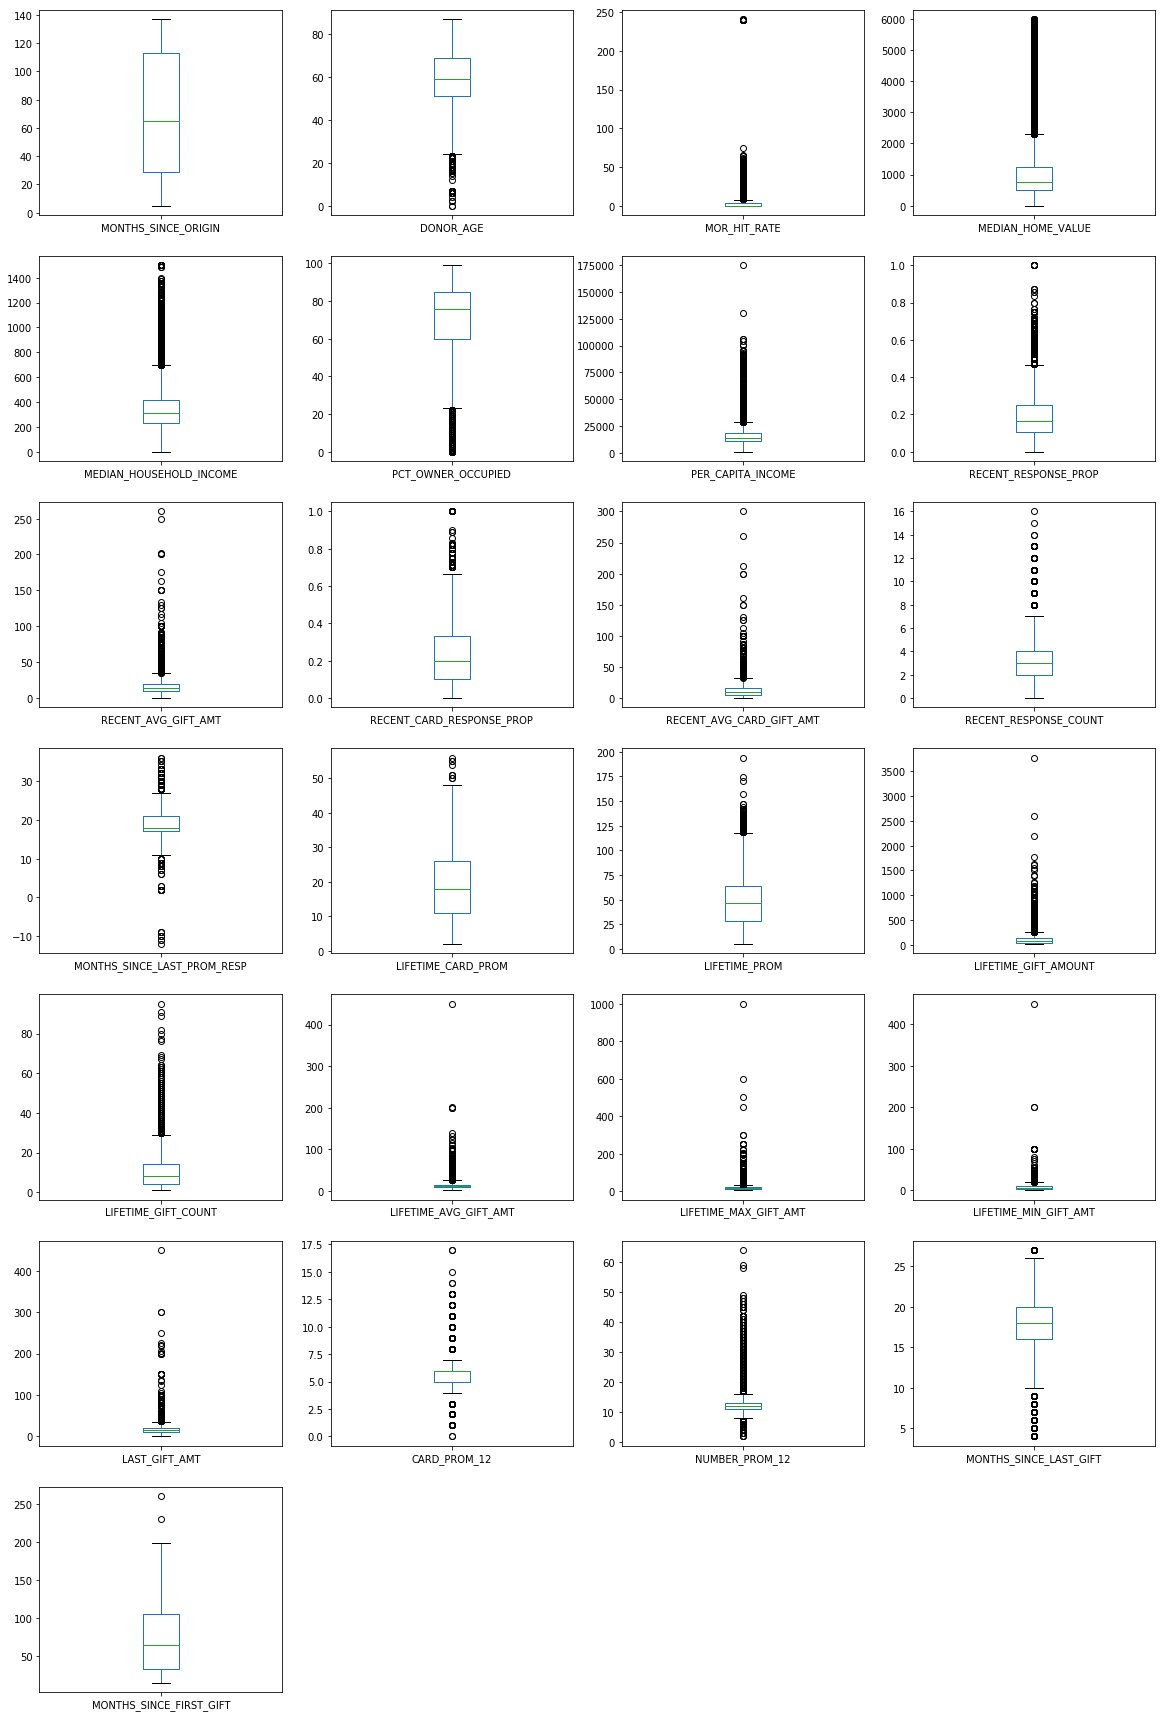

In [29]:
# drawing box plots, one graph with 43 subplots, !! do not share axes !!


dataset[[v for v in cont_var if v not in del_var]].plot(kind='box', subplots=True, figsize=(20,40),
                       layout=(9,4), sharex=False, sharey=False)
plt.show()

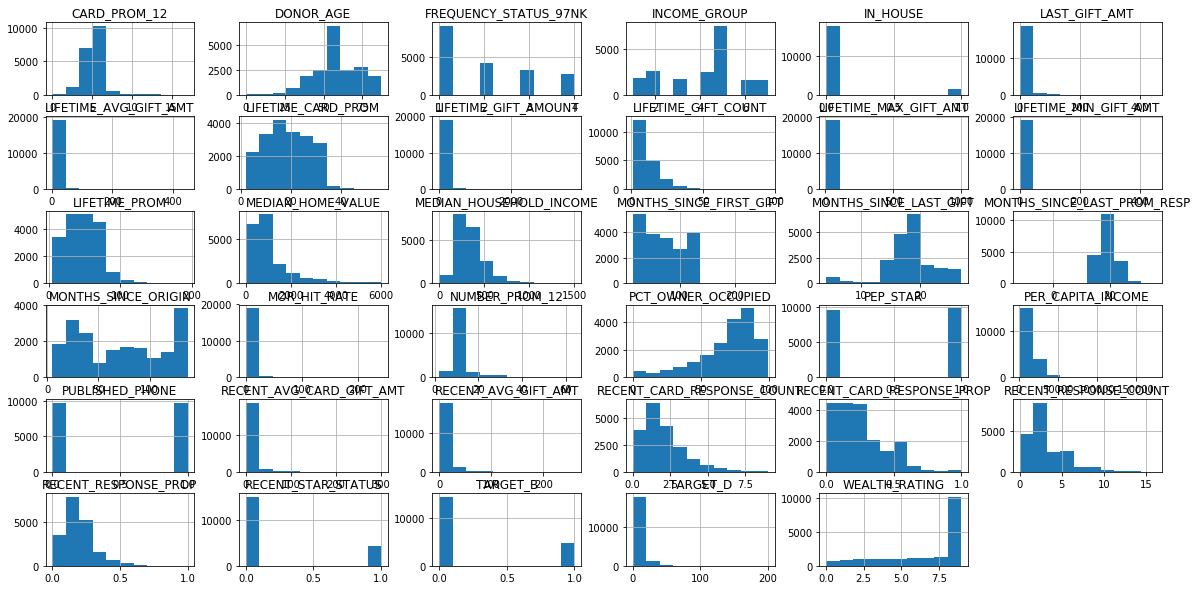

In [30]:
# We create a histogram for each input variable to get an idea of the distribution.

# histograms
dataset.hist(figsize=(20,10))
plt.show()

### 2 Multivariate Plots

Now we look at the interactions between the variables.
Let’s look at scatterplots of all pairs of attributes. 
This can be helpful to spot structured relationships between input variables.

In [ ]:
# scatter plot matrix
#scatter_matrix(dataset)
# plt.show()

# Note the diagonal grouping of some pairs of attributes. 
# This suggests a high correlation and a predictable relationship.


We get an idea from the plots that some of the classes are partially linearly separable 
in some dimensions, so we are expecting generally good results.




# Evaluate Some Algorithms

Now we try to model the data and then estimate their accuracy on unseen / new data.

We follow those steps:

1 / Separate out a validation dataset.
2 / Set-up the test harness to use 10-fold cross validation.
3 / Build 7 different models to predict species from flower measurements
4 / Select the best model.

### 1/ Create a Test Dataset

We need to evaluate the models we created.

Later, we use statistical methods to estimate the accuracy 
of the models that we create on unseen data.

We also want a more concrete estimate of the accuracy of the best model 
on unseen data by evaluating it on actual unseen data.

To do that we are holding back some data that the algorithms will not get to see
and we will use this data to get a second and independent idea 
of how accurate the best model might actually be.

We will split the loaded dataset into two, 80% of which we will use to train our models
and 20% that we will hold back as a test dataset.

In [36]:
# Split-out validation dataset

# here we convert the pandas dataframe into an array of figures
array = encoded_dataset.values

# Note : for array [rows , columns] 
# rows separated from column by comma

# features/ variables
X = array[:,2:] # : all rows , all columns from the seconds

# target B : donation or not
# Y needs to be one column only
Y = array[:,0] # : all rows , first column

# the percentage of the dataset in the test set
validation_size = 0.20

# the random seed a we are sampling randomly our data
# that is we select the lines in the 2 different set randomly
seed = 7

# Split-out validation dataset
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# we now have X_train and Y_train for preparing models
# and  X_validation and Y_validation we can use later.



### 2. Test Harness

We use 10-fold cross validation to estimate accuracy.
This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-validation splits.

In [37]:
# Test options and evaluation metric
seed = 7
scoring = 'f1' # 'precision' 'recall' ' f1' 

### 3. Build Models

We don’t  really  know which algorithms would be good on this problem 
or what configurations to use. 

We evaluate 7 different algorithms used for classification:

linear models: 
Logistic Regression (LR)
Linear Discriminant Analysis (LDA)

non linear models
K-Nearest Neighbors (KNN)
Classification and Regression Trees (CART)
Gaussian Naive Bayes (NB)
Support Vector Machines (SVM)
RandomForestClassifier (RF)

We reset the random number seed before each run to ensure 
that the evaluation of each algorithm is performed 
using exactly the same data splits. 
It ensures the results are directly comparable.



In [85]:
# Spot Check Algorithms: a list of the models we are going to use
models = []
models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GPC',GaussianProcessClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
#models.append(('NN',MLPClassifier()))


NameError: name 'GaussianProcessClassifier' is not defined

In [41]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.011169 (0.006608)
KNN: 0.146755 (0.026407)
CART: 0.290316 (0.012851)
NB: 0.340940 (0.024634)
RF: 0.132571 (0.018010)


C:\Users\Pairview Ltd\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


NN: 0.242425 (0.187927)


### 4. Select Best Model

We now have 5 models and f1 score for each. 
We need to compare the models to each other and select the most accurate.

We can see that it looks like the Naive Bayes has the largest score.

We can also create a plot of the model evaluation results and compare the spread 
and the mean accuracy of each model. 

There is a population of accuracy measures for each algorithm because each algorithm 
was evaluated 10 times (10 fold cross validation).


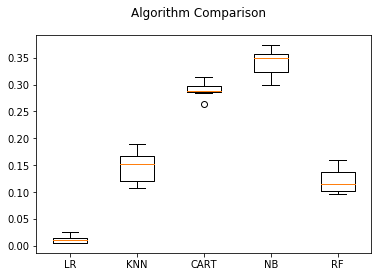

In [35]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#You can see that the box and whisker plots are squashed at the top of the range, with many samples achieving 100% accuracy.


In [82]:
# Advanced: feature selection. We have a lot of feature and we're trying to weed out 
# the feature bringing little to the model

from sklearn.feature_selection import RFE

# Create the RFE object and rank each pixel
rf =RandomForestClassifier()
rfe = RFE(estimator=rf, n_features_to_select=10, step=1)
rfe.fit(X_train, Y_train)

# Here we list the n most important features
from itertools import compress
l = encoded_dataset.columns.values[2:]
b = rfe.get_support(indices=False)
print(list(compress(l, b)))

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
  n_features_to_select=40, step=1, verbose=0)

### Make Predictions

The Naive Bayes is the best model that we tested. 

Now we want to get an idea of the f1 score of the model on our validation set.

This will give us an independent final check on the f1 of the best model.
It is valuable to keep a validation set just in case you made a slip during training, 
such as overfitting to the training set or a data leak. Both will result in 
an overly optimistic result.

We can run the CART model directly on the validation set and summarise the 
results as a final f1 score, a confusion matrix 
and a classification report.

In [84]:
# Make predictions on validation dataset
# here we train the model CART/Decision Tree on our full training set

# create a new model
nb = GaussianNB()
# we train it on the full training set
nb.fit(X_train[:,b], Y_train)

# Here the final countdown
# here we apply the model on the testing test we separated earlier on
predictions = nb.predict(X_validation[:,b])

print('F1 Score')
print(f1_score(Y_validation, predictions),'\n')

tn, fp, fn, tp = confusion_matrix(Y_validation, predictions).ravel()
print('Confusion Matrix')
print(confusion_matrix(Y_validation, predictions),'\n')

print ('True positives',tp)
print ('False positives',fp)
print ('True negatives',tn)
print ('False negatives',fn,'\n')

print('Classification Report')
print(classification_report(Y_validation, predictions),'\n')

F1 Score
0.2636534839924671 

Confusion Matrix
[[2492  410]
 [ 763  210]] 

True positives 210
False positives 410
True negatives 2492
False negatives 763 

Classification Report
             precision    recall  f1-score   support

        0.0       0.77      0.86      0.81      2902
        1.0       0.34      0.22      0.26       973

avg / total       0.66      0.70      0.67      3875
 



In [52]:
# Set mail cost and average donation

mail_cost = 2

avg_gift = 15

print('If the charity mails what the model indicates')
print('Our model will spend £', (tp+fp)*mail_cost, 
      'and earn £', tp*avg_gift, 
      'for a total of £',  tp*avg_gift-(tp+fp)*mail_cost)
print()
print('If the charity mails every one')
print('The charity spends £', (tp+fp+tn+fn)*mail_cost, 
      'and earns £', (tp+fn)*avg_gift, 
      'for a total of £',  (tp+fn)*avg_gift-(tp+fp+tn+fn)*mail_cost)


If the charity mails what the model indicates
Our model will spend £ 1864 and earn £ 4755 for a total of £ 2891

If the charity mails every one
The charity spends £ 7750 and earns £ 14595 for a total of £ 6845


Our model is superior to the base case of mailing every prospect as soon as the mailing cost is superior to £3.6 in total amount earned and return on investment


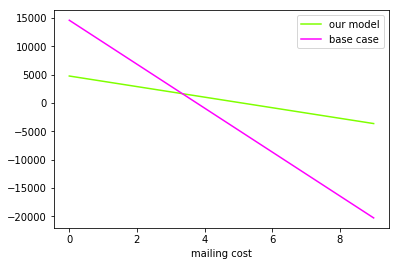

In [46]:
model_gain =[]
base_case = []

for i in range(10):
    model_gain.append(tp*avg_gift-(tp+fp)*i)
    base_case.append((tp+fn)*avg_gift-(tp+fp+tn+fn)*i)
    
fig = plt.figure()
ax = plt.axes()

x = range(10)
y1 = model_gain
y2 = base_case
ax.plot(x,y1,color='chartreuse', label ='our model')
ax.plot(x,y2,color='fuchsia', label ='base case')
ax.legend()
plt.xlabel('mailing cost')

print('Our model is superior to the base case of mailing every',
      'prospect as soon as the mailing cost is superior to £3.4',
      'in total amount earned and return on investment')

In [47]:
print('If the charity mails what the model indicates')
print('Our model will have a return on investment of', 
      round((tp*avg_gift-(tp+fp)*mail_cost) / (tp+fp)*mail_cost*100),' %')
print()
print('If the charity mails every one')
print('The charity will have a return on investment of',
      round (((tp+fn)*avg_gift-(tp+fp+tn+fn)*mail_cost)/(tp+fp+tn+fn)*100), ' %')


If the charity mails what the model indicates
Our model will have a return on investment of 620.0  %

If the charity mails every one
The charity will have a return on investment of 177.0  %


In [ ]:
# Next step is to use the prospect data!

# 1 step is get data exatly has it was for learning
# same columns, no missing values
# X_new 


# 2nd step is to producce the target variable
# Y_new = svc.predict(X_new)
